In [13]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [14]:
X_train = pd.read_csv('heart_data_train.csv').drop('HeartDisease',axis=1).iloc[: , 1:]
y_train = pd.read_csv('heart_data_train.csv').HeartDisease
X_test = pd.read_csv('heart_data_test.csv').drop('HeartDisease',axis=1).iloc[: , 1:]
y_test = pd.read_csv('heart_data_test.csv').HeartDisease

Features Significance Test:

In [15]:
import statsmodels.api as sm

X_r = sm.add_constant(X_train)

# fit the logistic regression model
model = sm.Logit(y_train, X_train).fit()

# view the model summary
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.478035
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:           HeartDisease   No. Observations:               467864
Model:                          Logit   Df Residuals:                   467827
Method:                           MLE   Df Model:                           36
Date:                Fri, 28 Apr 2023   Pseudo R-squ.:                  0.3103
Time:                        11:30:12   Log-Likelihood:            -2.2366e+05
converged:                       True   LL-Null:                   -3.2430e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Smoking_1.0              0.4223      0.008     55.937      0.000       0.408       0.437

All variables are significant since their p-value are less than 0.05.

Model fitting:

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [25]:
#print(X_train.head())
lr_model = LogisticRegression()

#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

param_grid = {'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(lr_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and train the logistic regression model
best_lr = LogisticRegression(**grid_search.best_params_)

best_lr.fit(X_train, y_train)

y_pred = best_lr.predict(X_test)
y_pred_prob = best_lr.predict_proba(X_test)[:,1]

Model Evaluations:

In [26]:
#from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import log_loss 

In [27]:
auc_score = roc_auc_score(y_test, y_pred_prob)
ber_score = 1 - balanced_accuracy_score(y_test,y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
logloss = log_loss(y_test, y_pred, eps=1e-15)
print("AUC Score: {:.2f}".format(auc_score))
print("BER Score: {:.2f}".format(ber_score))
print("f1 Score: {:.2f}".format(f1))
print("Precision Score: {:.2f}".format(precision))
print("Recall Score: {:.2f}".format(recall))
print("Log Loss Score: {:.2f}".format(logloss))

AUC Score: 0.77
BER Score: 0.31
f1 Score: 0.29
Precision Score: 0.19
Recall Score: 0.66
Log Loss Score: 9.50


Confusion Matrix:

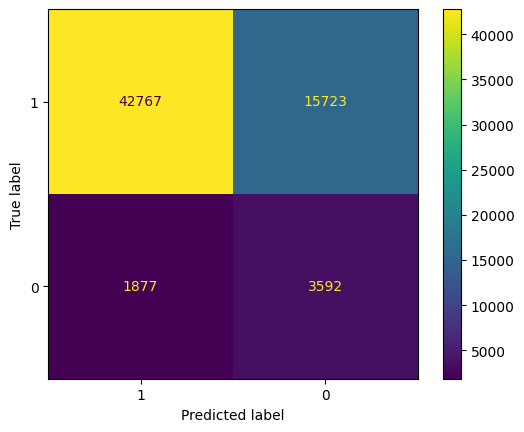

In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm_train = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm_train, display_labels = [1, 0])
cm_display.plot()
plt.show()

ROC Curve:

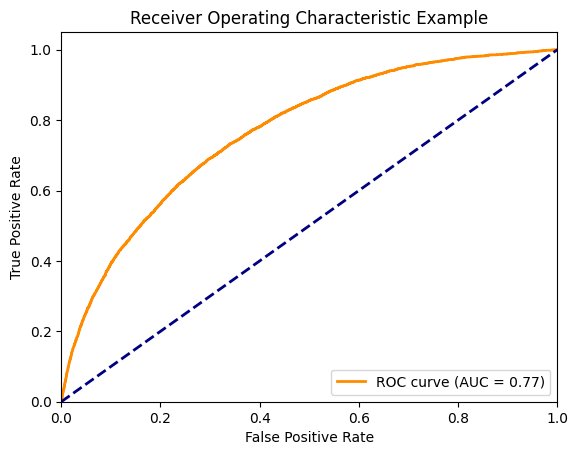

In [29]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Example')
plt.legend(loc="lower right")
plt.show()